In [6]:
from gensim.models import Word2Vec

In [4]:
import jieba
import string

punctuation = set(string.punctuation)
# 添加中文常见标点
punctuation.update(['，', '。', '！', '？', '、', '；', '：', '“', '”', '‘', '’', '（', '）', '《', '》', '……', '—', '\u3000'])

def clean_text(text):
    # 使用 jieba 进行分词
    words = jieba.lcut(text)
    # 过滤掉标点符号和空白字符
    filtered_words = [word for word in words if word not in punctuation and not word.isspace()]
    return filtered_words

lines = []
with open('./data/nplm/xiyouji.txt', 'r', encoding='utf-16') as f:
    for line in f:
        words = clean_text(line)
        if len(words) > 0:
            lines.append(words)

In [8]:
model = Word2Vec(lines, vector_size=20, window=2, min_count=0)

In [9]:
model.wv.most_similar('悟空', topn=10)

[('哥哥', 0.9947131276130676),
 ('师兄', 0.9940539002418518),
 ('二哥', 0.9934366345405579),
 ('骂', 0.9891446828842163),
 ('贤弟', 0.9886110424995422),
 ('菩萨', 0.9876952767372131),
 ('说得有理', 0.9865987300872803),
 ('长老', 0.986056923866272),
 ('么', 0.985822856426239),
 ('且莫', 0.9850867390632629)]

In [10]:
model.wv.most_similar('大圣', topn=10)

[('猴王', 0.9779082536697388),
 ('一场', 0.9634241461753845),
 ('太子', 0.9566625356674194),
 ('猴儿', 0.9565659761428833),
 ('那怪', 0.9538566470146179),
 ('呆子', 0.9510267972946167),
 ('小龙', 0.9509499073028564),
 ('土地', 0.9491739273071289),
 ('沙僧笑', 0.9484503269195557),
 ('老儿', 0.9481974840164185)]

In [12]:
model.wv.most_similar('三藏', topn=10)

[('长老', 0.9893518090248108),
 ('祖师', 0.9890620112419128),
 ('八戒', 0.9887604713439941),
 ('行者', 0.9885756373405457),
 ('菩萨', 0.9863406419754028),
 ('那怪', 0.9807384610176086),
 ('滴泪', 0.977783739566803),
 ('老者', 0.9776397347450256),
 ('陛下', 0.9768396615982056),
 ('悟空', 0.9752951264381409)]

In [20]:
model.wv.most_similar('妖怪', topn=10)

[('孙行者', 0.9920276999473572),
 ('那个', 0.990764319896698),
 ('这般', 0.9902885556221008),
 ('孙悟空', 0.9902006387710571),
 ('儿子', 0.989229679107666),
 ('买卖', 0.9885293245315552),
 ('宝贝', 0.9882150292396545),
 ('手段', 0.9880130290985107),
 ('猢狲', 0.9874058365821838),
 ('东西', 0.9871622323989868)]

In [13]:
word_vectors = model.wv
words = list(word_vectors.key_to_index)
vectors = [word_vectors[word] for word in words]

In [16]:
word_to_idx = {}

for i, w in enumerate(words):
    word_to_idx[w] = i

In [15]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=2).fit_transform(vectors)

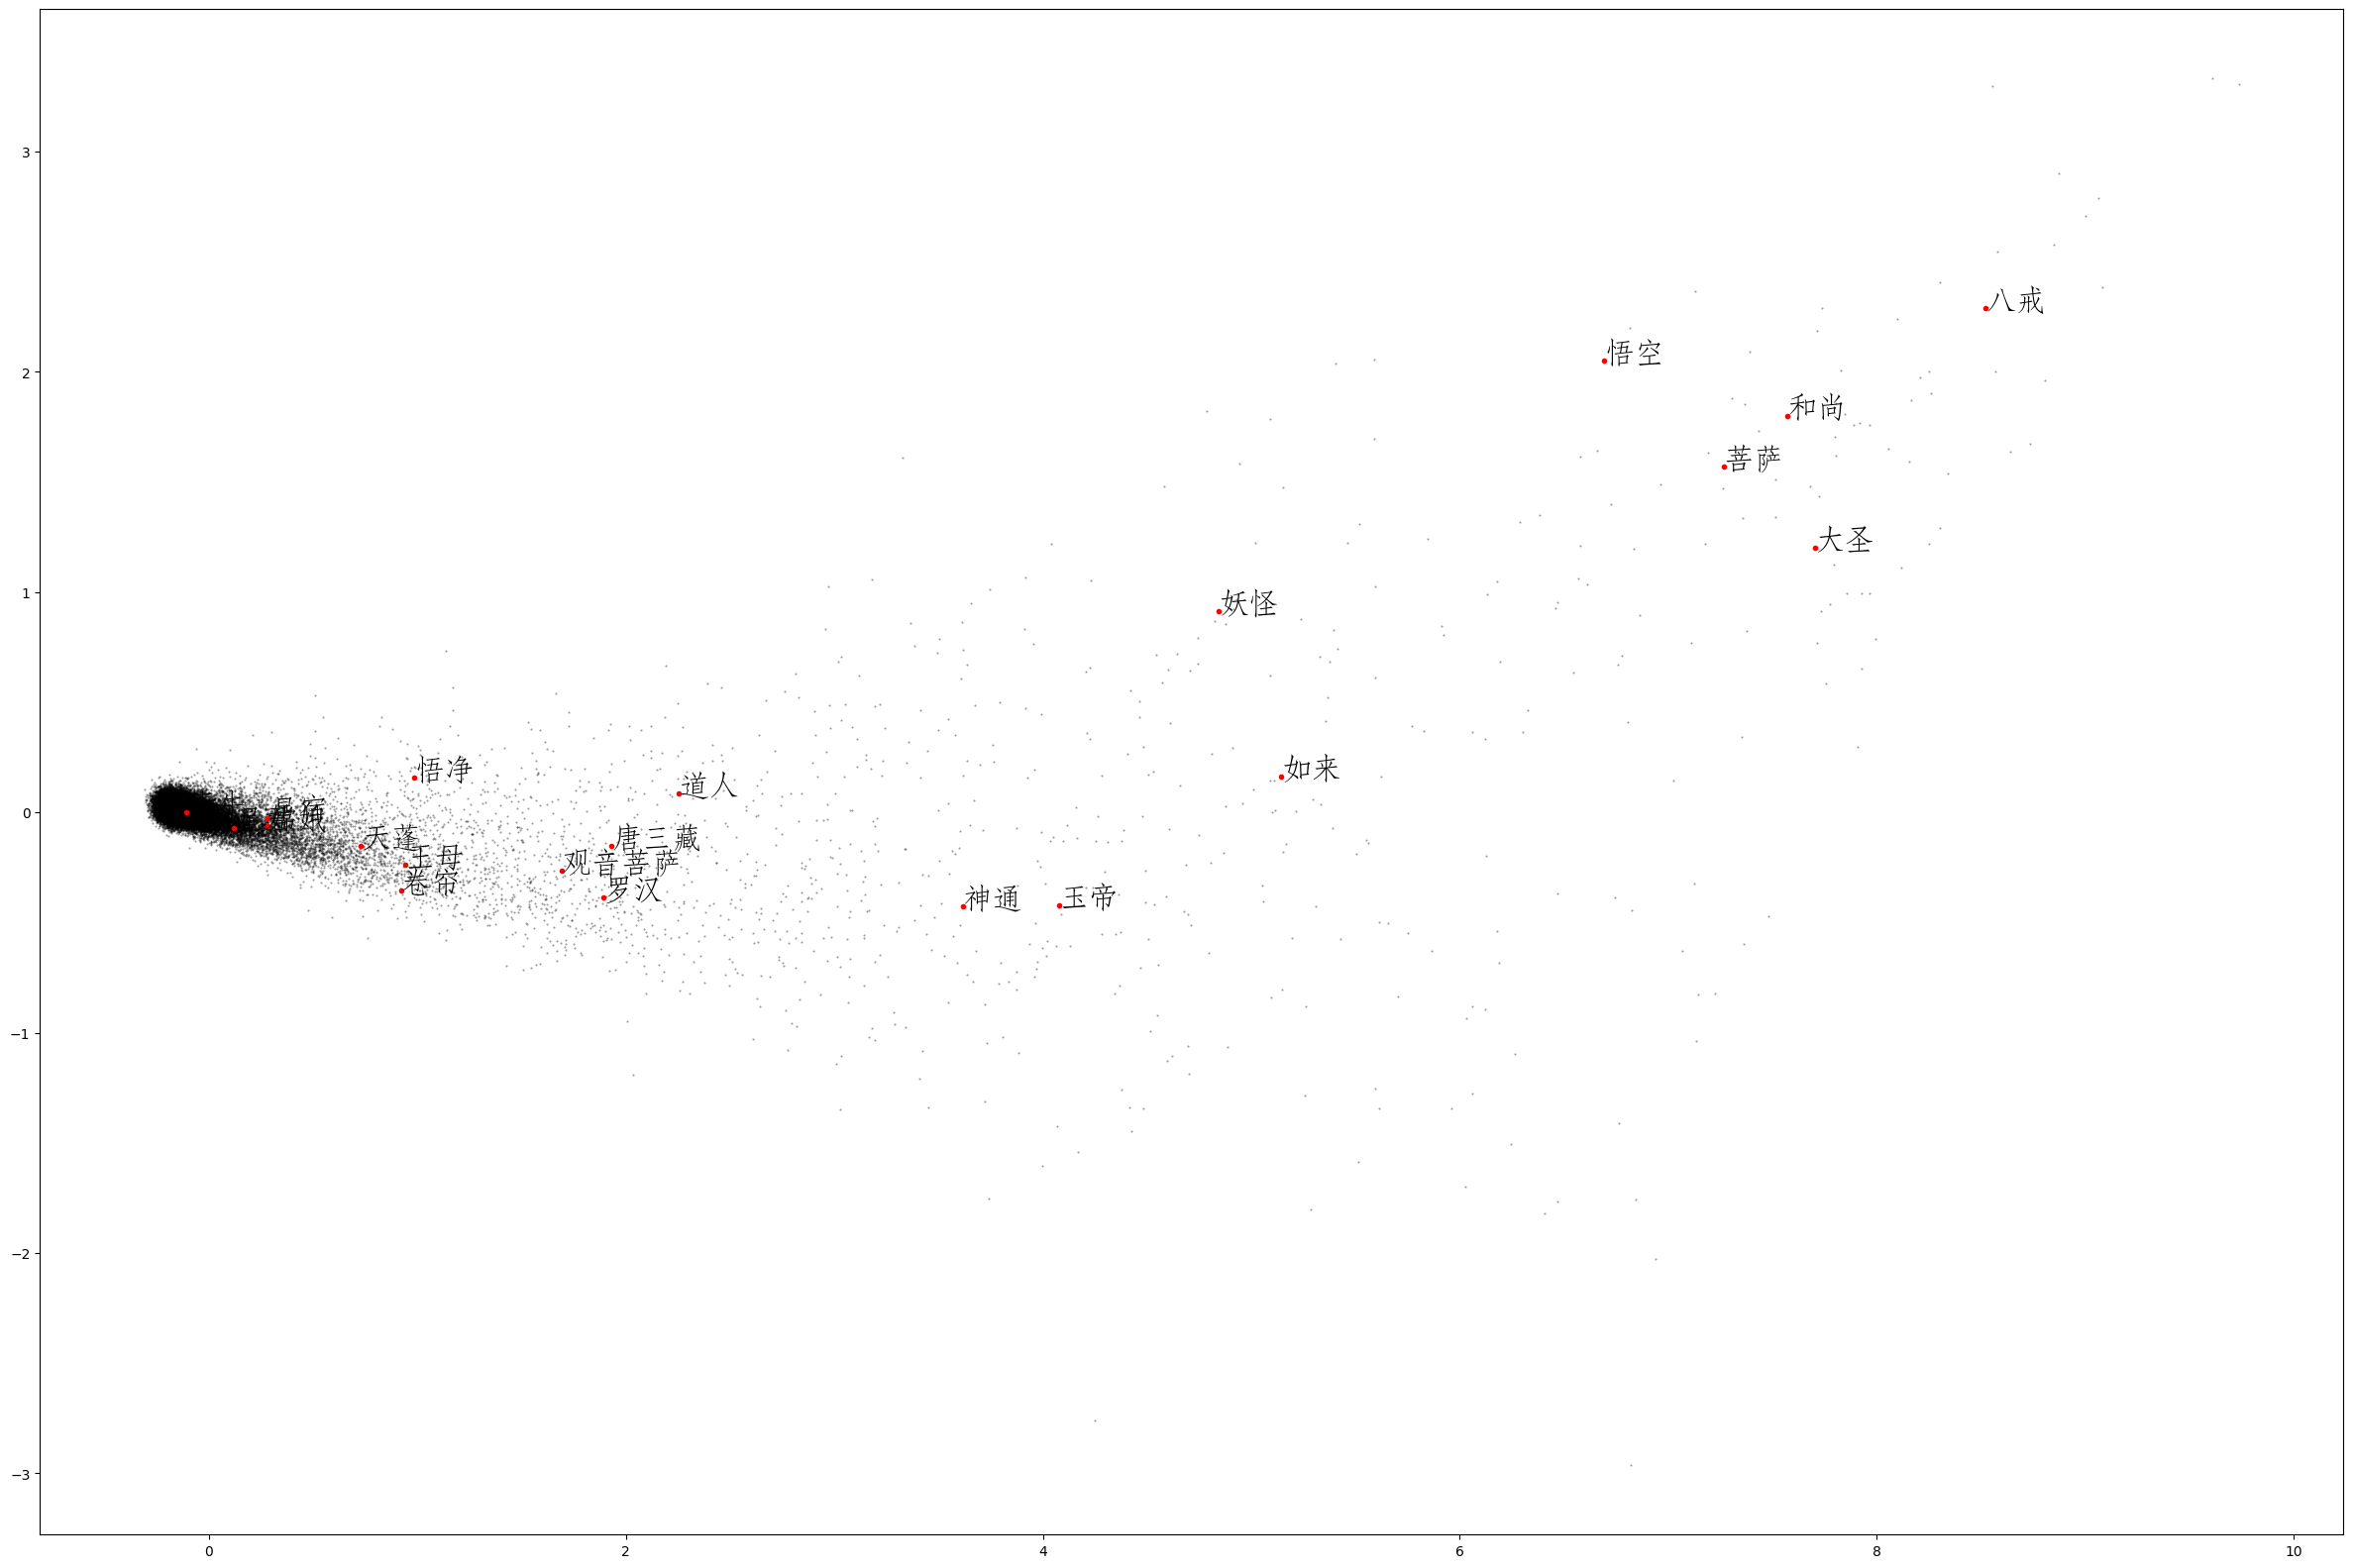

In [17]:
import matplotlib.pyplot as plt
import matplotlib
import os

fig = plt.figure(figsize = (30, 20))
ax = fig.gca()
ax.set_facecolor('white')
ax.plot(X_reduced[:, 0], X_reduced[:, 1], '.', markersize = 1, alpha = 0.4, color = 'black')

highlight_words = ['悟空', '八戒', '悟净', '观音菩萨', '如来', '罗汉', '玉帝', '大圣','唐三藏', '和尚', '道人', '星君', '青牛', '王母', '神通', '星宿', '菩萨', '妖怪', '嫦娥', '天蓬', '卷帘']

zhfont1 = matplotlib.font_manager.FontProperties(fname='./data/nplm/HuaWenFangSong-1.ttf', size=22)

for w in highlight_words:
    if w in words:
        ind = word_to_idx[w]
        xy = X_reduced[ind]
        plt.plot(xy[0], xy[1], '.', alpha =1, color = 'red')
        plt.text(xy[0], xy[1], w, fontproperties = zhfont1, alpha = 1, color = 'black')
        
plt.show()

In [18]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=23)
X_reduced = tsne.fit_transform(vectors)

c:\Users\moutsea\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\moutsea\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


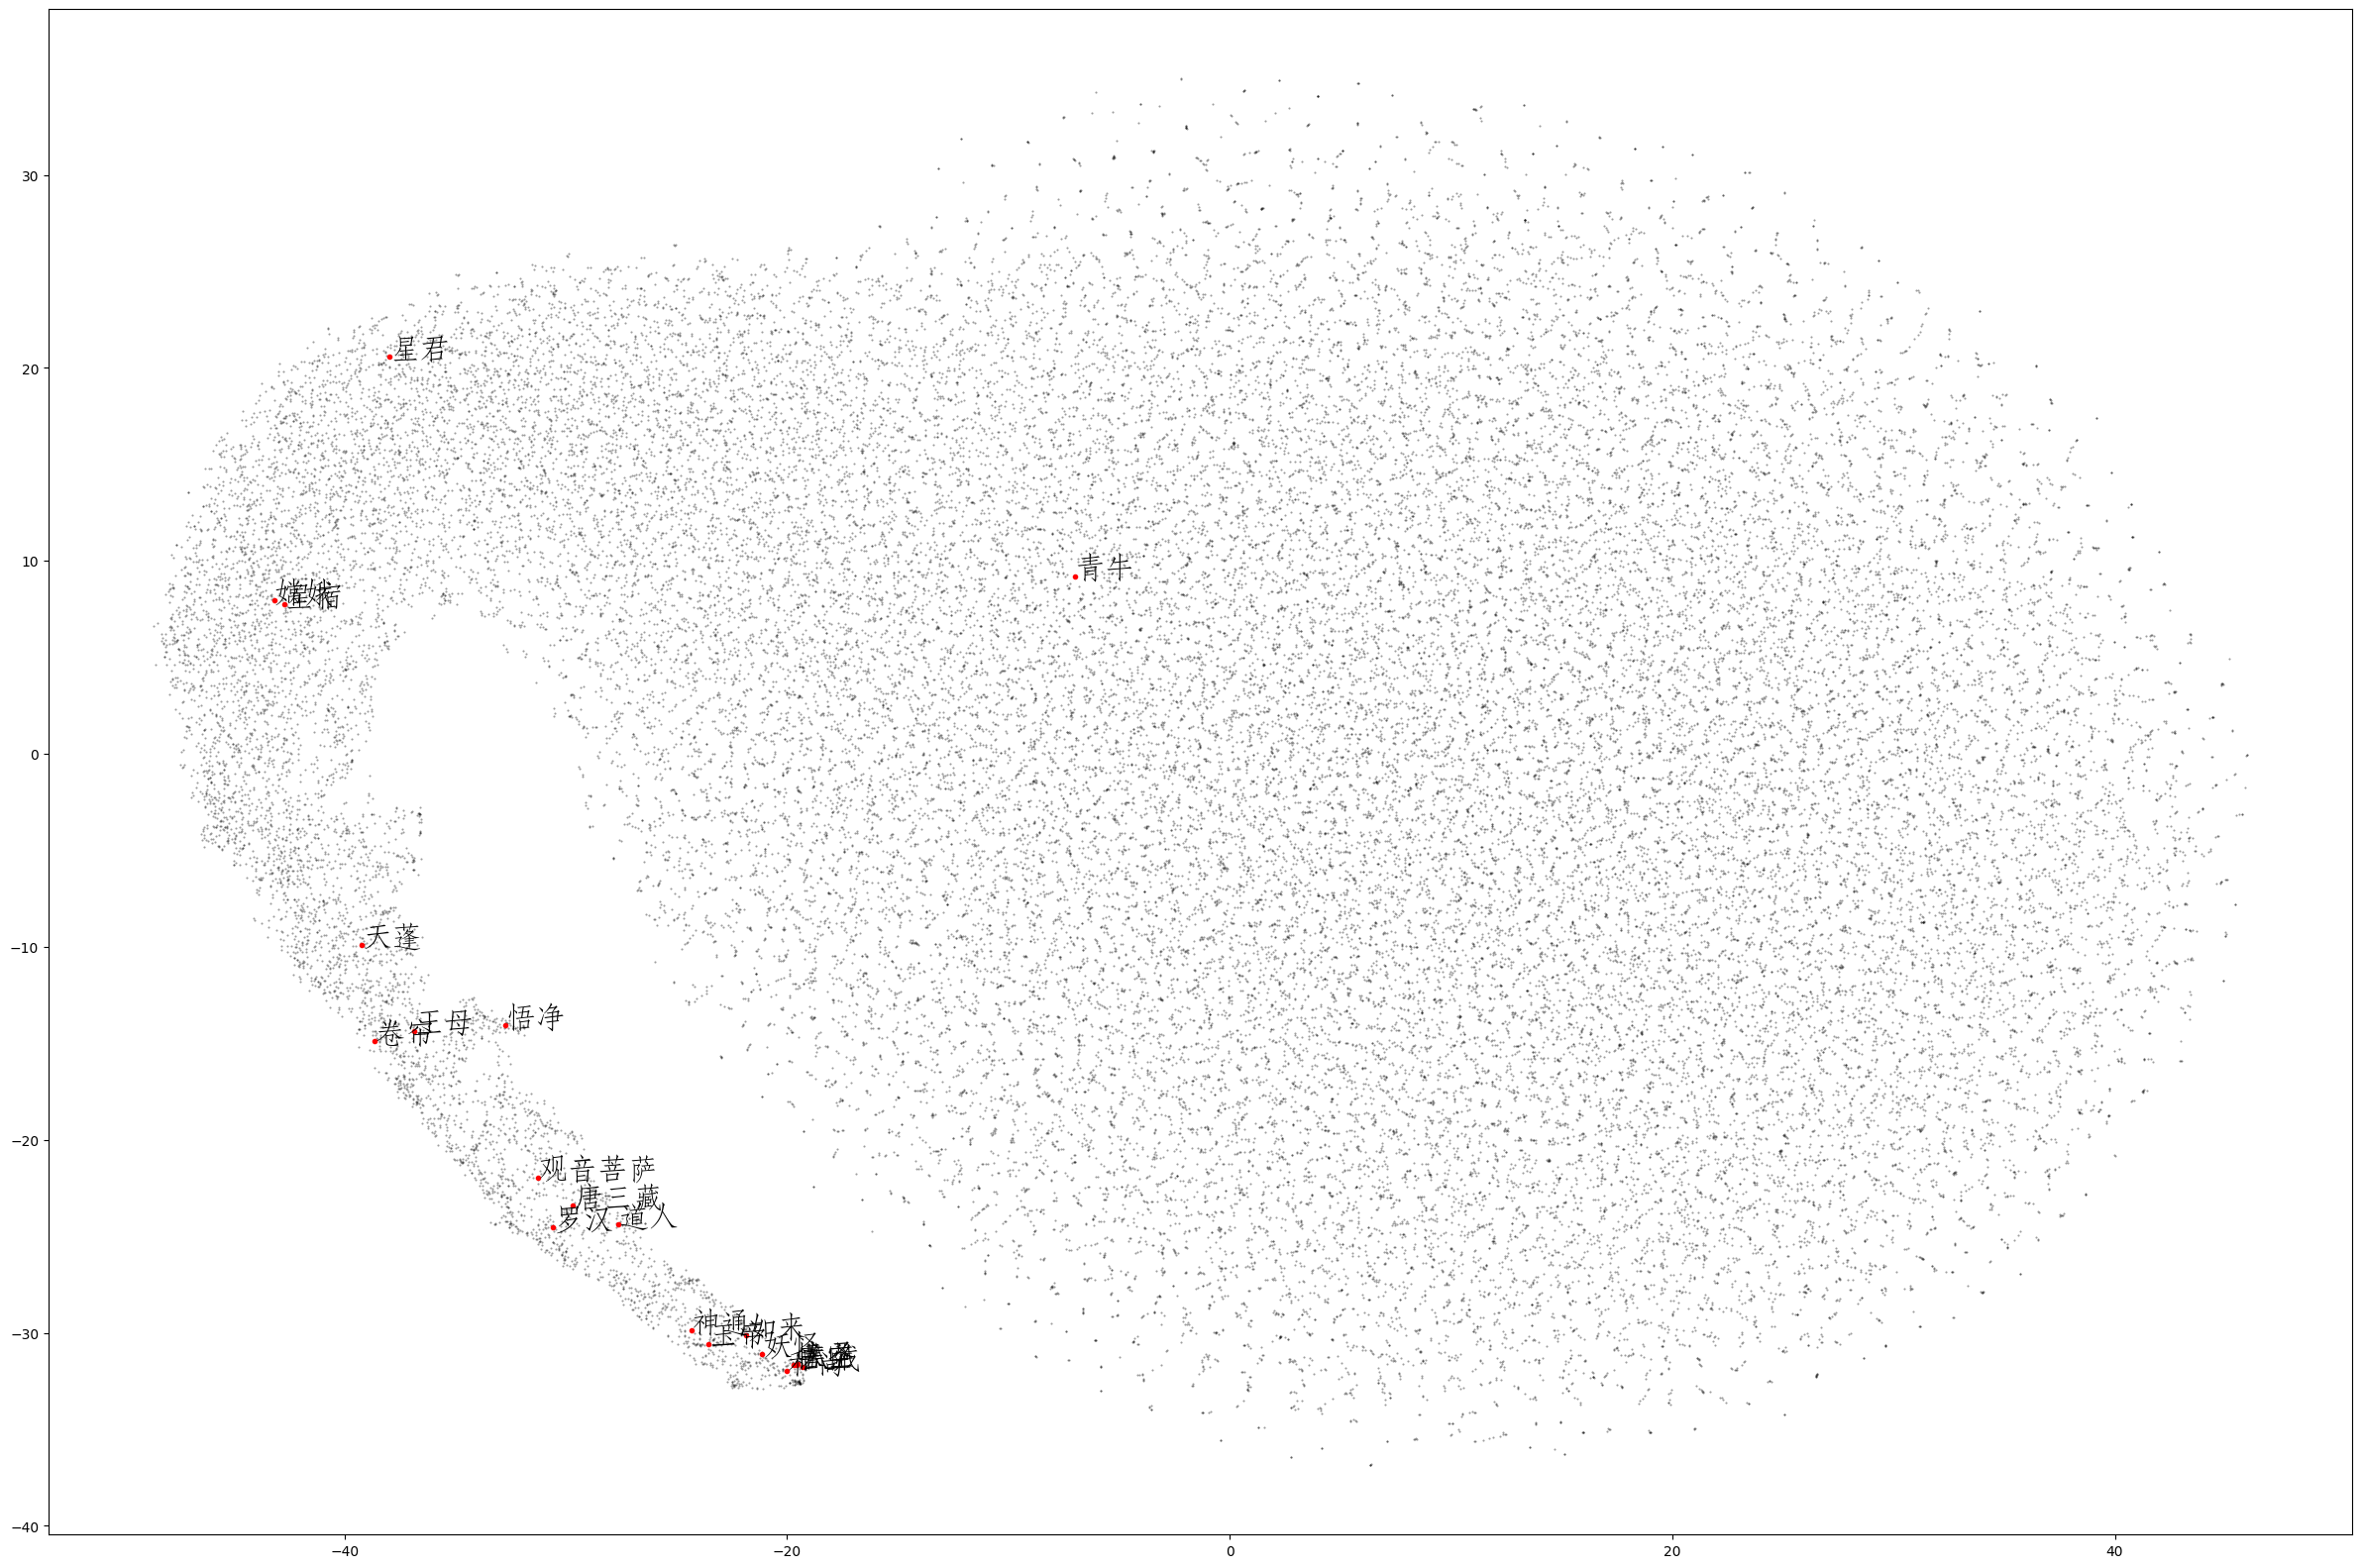

In [19]:

fig = plt.figure(figsize = (30, 20))
ax = fig.gca()
ax.set_facecolor('white')
ax.plot(X_reduced[:, 0], X_reduced[:, 1], '.', markersize = 1, alpha = 0.4, color = 'black')

highlight_words = ['悟空', '八戒', '悟净', '观音菩萨', '如来', '罗汉', '玉帝', '大圣','唐三藏', '和尚', '道人', '星君', '青牛', '王母', '神通', '星宿', '菩萨', '妖怪', '嫦娥', '天蓬', '卷帘']

zhfont1 = matplotlib.font_manager.FontProperties(fname='./data/nplm/HuaWenFangSong-1.ttf', size=22)

for w in highlight_words:
    if w in words:
        ind = word_to_idx[w]
        xy = X_reduced[ind]
        plt.plot(xy[0], xy[1], '.', alpha =1, color = 'red')
        plt.text(xy[0], xy[1], w, fontproperties = zhfont1, alpha = 1, color = 'black')
        
plt.show()